<center><h1 style="font-size:35px; font-family: 'Calisto MT'; letter-spacing: 0.1em; background-color: RGB(128,0,128);"> Statistiques Exploratoire Spatiales (avec Python) </h1></center>
<center><h3 style="font-size:25px; font-family: 'Calisto MT'; letter-spacing: 0.1em; background-color: RGB(51,165,182);"> Réalisé par le Groupe 3 </h3></center>
ENSAE 2024 : ISE1 CL

<center><h2 style="font-size:28px; font-family: 'Calisto MT'; letter-spacing: 0.1em;"> TP1 : Importation et Visualisation de données </h2></center>

__________________________________________________________________________________________

In [9]:
# Définition de notre work directory
import os
directory='D:/ISEP3/Semestre 1/Statistique spatiale et exploratoire/Statistique-Exploratoire-Spatiale/Devoir_1/Mali'
os.chdir(directory)

<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian">Les préliminaires...</h2>

# Les fichiers utilisés

Petit rappel sur la composition des shapefiles : 
Le niveau 0 du shapfile représente le pays en entier, le niveau 1 les régions, le niveau 2, les départements et le niveau 3, les cercles pour ce qui est du Mali.

le Rasteur Mali est un polygone qui a la forme du Mali

# Les bibliothèques utilisées

- La bibliothèque **rasterio** : elle permet de lire et manipuler le fichier .tiff.
- La bibliothèque **geopandas** : elle permet de lire et manipuler le shapefile des divisions administratives.
- La bibliothèque **matplotlib** : elle permet d'afficher l'image.
- La bibliothèque **folium** : elle est utilisée pour créer des cartes interactives basées sur les données géospatiales. 


In [41]:
#importation des libraries

import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian"> Visualisation des données </h2>

Dans cette partie, le travail sera d'abord fait sur le fichier contenant les divisions administratives de niveau 2. On répliquera alors le processus sur les autres

# Importation des fichiers

In [42]:

# Importation du  .tiff
tiff_file = '201501_Global_Travel_Time_to_Cities_MLI.tiff'

# Importatation du shapefile contenant les divisions administratives
shapefile = 'mli_admbnda_adm2_1m_gov_20211220.shp'


# Ouverture du .tiff avec rasterio et visualisatio des données

In [43]:
#  Ouverture du .tiff avec rasterio
with rasterio.open(tiff_file) as src:
    # Lire la première couche du fichier .tiff
    tiff_data = src.read(1)

    # Affichage des métadonnées du .tiff
    print(src.meta)
    
  # Lecture des informations de transformation pour projeter correctement les données
    transform = src.transform

{'driver': 'GTiff', 'dtype': 'int32', 'nodata': -9999.0, 'width': 1975, 'height': 1780, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.008333333333333333, 0.0, -12.208333333333332,
       0.0, -0.008333333333333333, 25.0)}


# Afichage de l'image rasteur

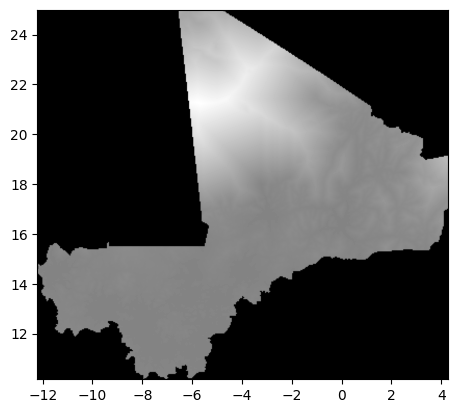

In [44]:
# Affichage l'image .tiff
plt.imshow(tiff_data, cmap='gray', extent=(transform[2], transform[2] + transform[0] * tiff_data.shape[1],
                                           transform[5] + transform[4] * tiff_data.shape[0], transform[5]))


# Afichage des limites administratives

In [45]:
# Charger le shapefile avec geopandas
gdf = gpd.read_file(shapefile)



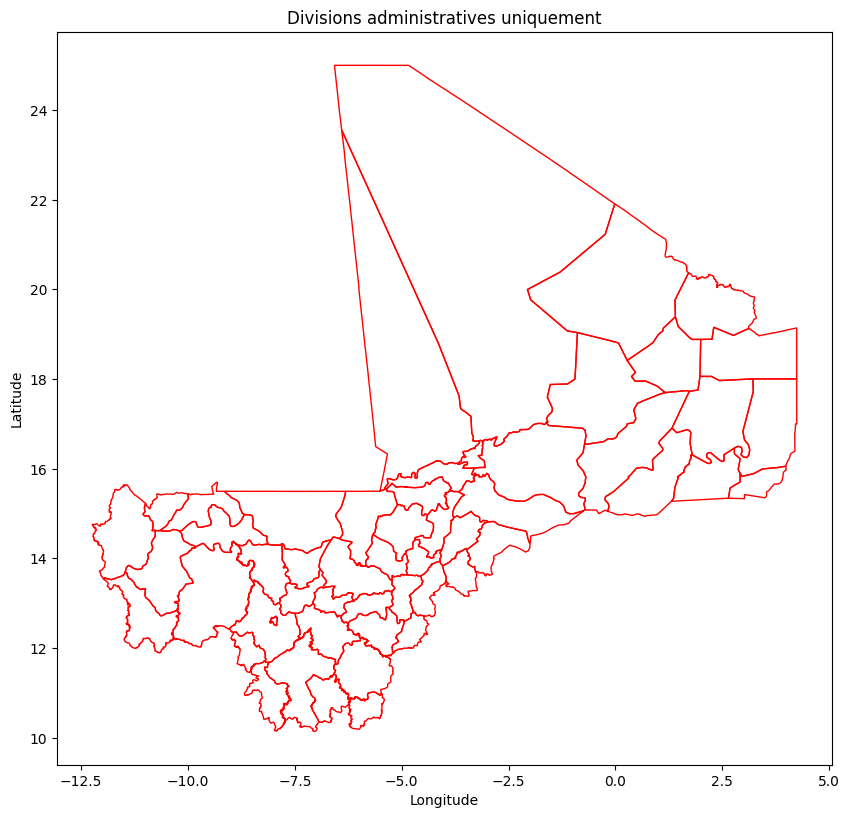

In [46]:
# Afficher la carte avec les données raster et les limites administratives
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher les divisions administratives
gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=1)

# Ajouter une légende et des axes
plt.title('Divisions administratives uniquement')
plt.xlabel('Longitude')
plt.ylabel('Latitude')    
plt.show()


<!-- .element: class="fragment" -->

# Visualisation des deux en même temps

**Nous avions visualisé les limites (boundaries) et le rasteur séparément. Maintenant, mettons les ensemble.**

## Rasteur et limites sur un même graphe

Text(91.97222222222221, 0.5, 'Latitude')

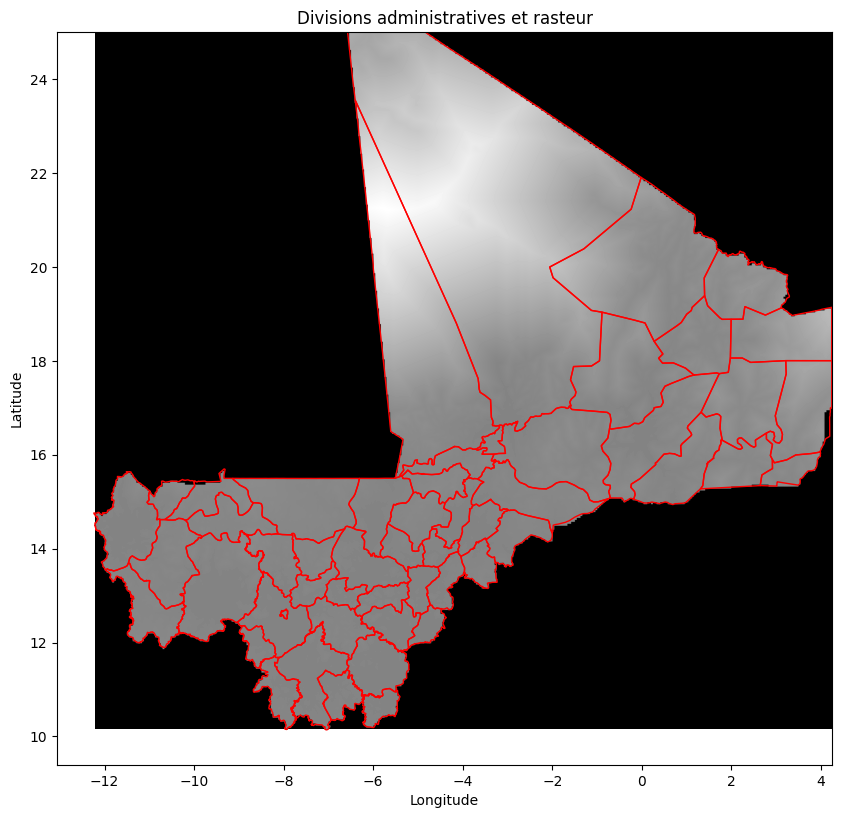

In [16]:
# Mix des deux
# Afficher la carte avec les données raster et les limites administratives
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher l'image .tiff
plt.imshow(tiff_data, cmap='gray', extent=(transform[2], transform[2] + transform[0] * tiff_data.shape[1],
                                           transform[5] + transform[4] * tiff_data.shape[0], transform[5]))
# Afficher les divisions administratives
gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=1)

# Ajouter une légende et des axes
plt.title('Divisions administratives et rasteur')
plt.xlabel('Longitude')
plt.ylabel('Latitude')    



In [17]:
# Afficher la carte
plt.show()

_ 

_

## Ajout des labels

Les labels se trouvenet dans le .dbf qui est chargé dans notre gdf. Regardons cette base de données

### Visualisation de la base de données

In [18]:
# Visualisons un peu la base
# On s'interesse au fichier dbf qui contient les données

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Shape_Leng  53 non-null     float64       
 1   Shape_Area  53 non-null     float64       
 2   ADM2_FR     53 non-null     object        
 3   ADM2_PCODE  53 non-null     object        
 4   ADM2_REF    10 non-null     object        
 5   ADM2ALT1FR  0 non-null      object        
 6   ADM2ALT2FR  0 non-null      object        
 7   ADM1_FR     53 non-null     object        
 8   ADM1_PCODE  53 non-null     object        
 9   ADM0_FR     53 non-null     object        
 10  ADM0_PCODE  53 non-null     object        
 11  date        53 non-null     datetime64[ms]
 12  validOn     53 non-null     datetime64[ms]
 13  validTo     53 non-null     object        
 14  geometry    53 non-null     geometry      
dtypes: datetime64[ms](2), float64(2), geometry(1), object(10)
memory usa

In [19]:
gdf.head(5)

,Shape_Leng,Shape_Area,ADM2_FR,ADM2_PCODE,ADM2_REF,ADM2ALT1FR,ADM2ALT2FR,ADM1_FR,ADM1_PCODE,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,6.708207,1.654741,Bafoulabe,ML0101,None,None,None,Kayes,ML01,Mali (le),ML,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-10.27128 14.63815, -10.19528 14.606..."
1,6.617321,1.075836,Diéma,ML0102,Diema,None,None,Kayes,ML01,Mali (le),ML,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-9.32307 15.14695, -9.2323 15.1222, ..."
2,7.243382,1.899436,Kayes,ML0103,None,None,None,Kayes,ML01,Mali (le),ML,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-11.44158 15.63832, -11.43401 15.635..."
3,8.276270,1.245417,Kéniéba,ML0104,Kenieba,None,None,Kayes,ML01,Mali (le),ML,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-11.32625 13.53005, -11.29225 13.494..."
4,10.839833,2.981976,Kita,ML0105,None,None,None,Kayes,ML01,Mali (le),ML,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-8.9158 14.34506, -8.90262 14.34448,..."


In [20]:
# On va voir la colonne qui contient les données
gdf.columns

Index(['Shape_Leng', 'Shape_Area', 'ADM2_FR', 'ADM2_PCODE', 'ADM2_REF',
       'ADM2ALT1FR', 'ADM2ALT2FR', 'ADM1_FR', 'ADM1_PCODE', 'ADM0_FR',
       'ADM0_PCODE', 'date', 'validOn', 'validTo', 'geometry'],
      dtype='object')

_

**Là, on choisit la colonne contenant les labels et on les affiches**

### Affichage des labels

Text(91.97222222222221, 0.5, 'Latitude')

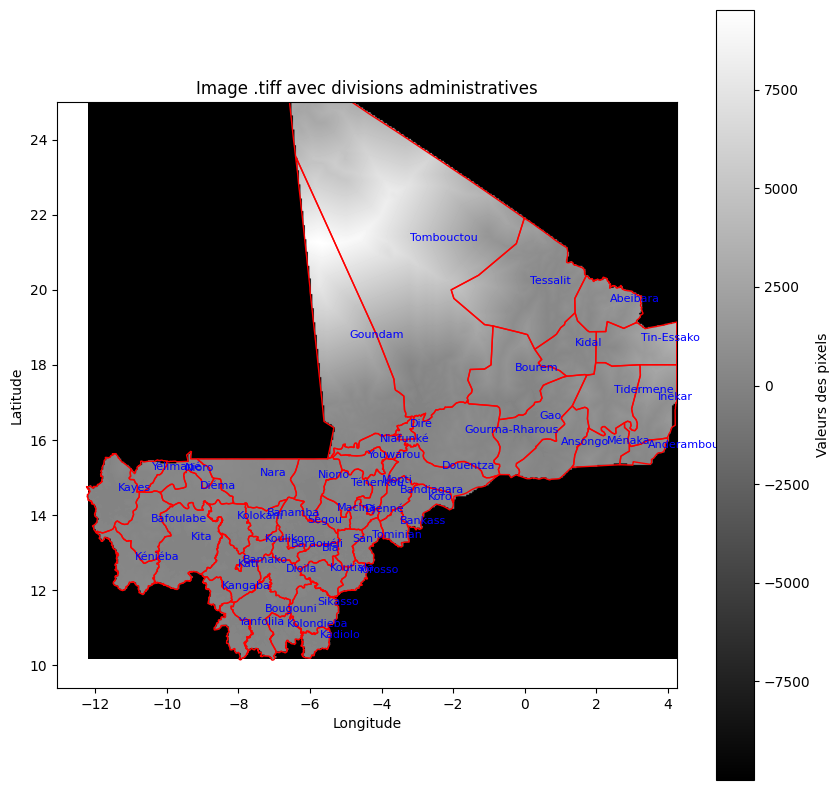

In [21]:
# Afficher la carte avec les données raster et les limites administratives
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher l'image .tiff
plt.imshow(tiff_data, cmap='gray', extent=(transform[2], transform[2] + transform[0] * tiff_data.shape[1],
                                           transform[5] + transform[4] * tiff_data.shape[0], transform[5]))

# Afficher les divisions administratives
gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=1)

# Ajouter les labels
for idx, row in gdf.iterrows():
    # Utiliser le centroïde de chaque division pour positionner le label
    centroid = row.geometry.centroid
    plt.annotate(text=row['ADM2_FR'], xy=(centroid.x, centroid.y), 
                 xytext=(3, 3), textcoords="offset points", 
                 fontsize=8, color='blue')
    
# Ajouter une légende et des axes
plt.colorbar(label='Valeurs des pixels')
plt.title('Image .tiff avec divisions administratives')
plt.xlabel('Longitude')
plt.ylabel('Latitude')




In [22]:
# Afficher la carte
plt.show()

### Affichage de la carte complète avec les autres niveaux

In [23]:
# Chemin vers ton fichier .tiff
tiff_file = '201501_Global_Travel_Time_to_Cities_MLI.tiff'

# Chemin vers ton fichier shapefile contenant les divisions administratives
shapefile = 'mli_admbnda_adm0_1m_gov_20211220.shp'

# Ouvrir le fichier .tiff avec rasterio
with rasterio.open(tiff_file) as src:
    # Lire la première couche du fichier .tiff
    tiff_data = src.read(1)

    # Lire les informations de transformation pour projeter correctement les données
    transform = src.transform

# Charger le shapefile avec geopandas
gdf = gpd.read_file(shapefile)

In [24]:
gdf.head(5)

,Shape_Leng,Shape_Area,ADM0_FR,ADM0_PCODE,ADM0_REF,ADM0ALT1FR,ADM0ALT2FR,date,validOn,validTo,geometry
0,71.768739,106.823823,Mali (le),ML,None,None,None,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-4.83349 24.99951, -4.80015 24.97588..."


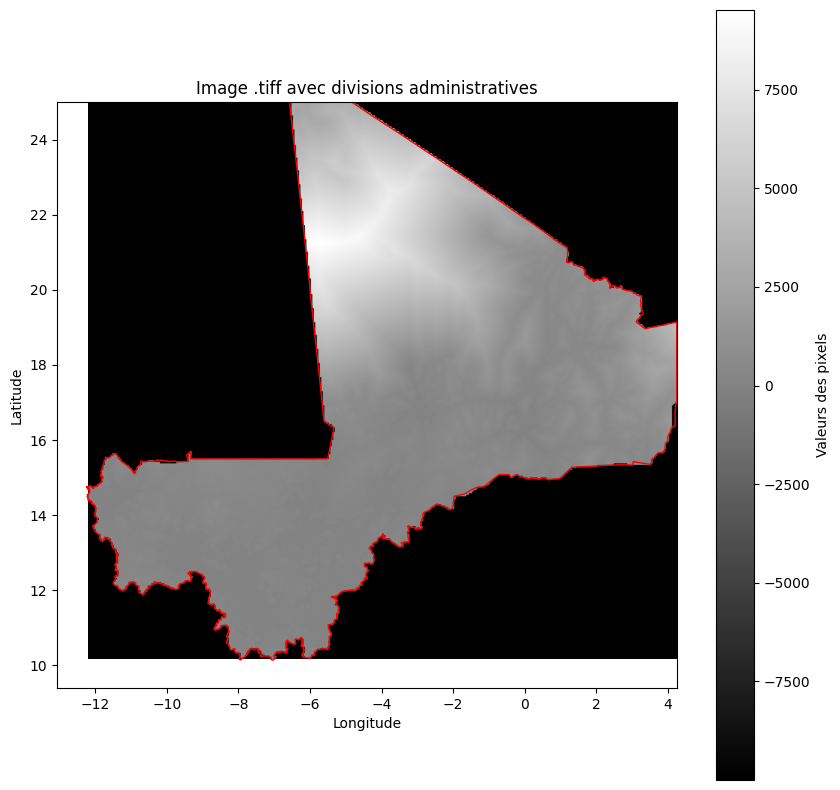

In [25]:
# Afficher la carte avec les données raster et les limites administratives
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher l'image .tiff
plt.imshow(tiff_data, cmap='gray', extent=(transform[2], transform[2] + transform[0] * tiff_data.shape[1],
                                           transform[5] + transform[4] * tiff_data.shape[0], transform[5]))

# Afficher les divisions administratives
gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=1)

# Ajouter une légende et des axes
plt.colorbar(label='Valeurs des pixels')
plt.title('Image .tiff avec divisions administratives')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


_


Voyons avec les autres (modifications en instantané)

In [26]:
#  fichier .tiff
tiff_file = '201501_Global_Travel_Time_to_Cities_MLI.tiff'

# fichier shapefile contenant les divisions administratives
shapefile = 'mli_admbnda_adm1_1m_gov_20211220.shp'

# Ouvrir le fichier .tiff avec rasterio
with rasterio.open(tiff_file) as src:
    # Lire la première couche du fichier .tiff
    tiff_data = src.read(1)

    # Lire les informations de transformation pour projeter correctement les données
    transform = src.transform

# Charger le shapefile avec geopandas
gdf = gpd.read_file(shapefile)

In [27]:
gdf.head(5)

,Shape_Leng,Shape_Area,ADM1_FR,ADM1_PCODE,ADM1_REF,ADM1ALT1FR,ADM1ALT2FR,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,20.449044,10.250256,Kayes,ML01,None,None,None,Mali (le),ML,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-9.33008 15.49779, -9.32934 15.4968,..."
1,21.764713,7.563718,Koulikoro,ML02,None,None,None,Mali (le),ML,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-9.00038 15.49748, -8.98331 15.49567..."
2,20.958431,5.965027,Sikasso,ML03,None,None,None,Mali (le),ML,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-5.11493 12.65576, -5.10873 12.62608..."
3,14.430528,5.158060,Ségou,ML04,Segou,None,None,Mali (le),ML,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-5.33016 15.49615, -5.31408 15.4947,..."
4,16.266328,6.649725,Mopti,ML05,None,None,None,Mali (le),ML,2015-06-01,2021-12-20,0000/00/00,"POLYGON ((-3.23658 15.85735, -3.23052 15.85703..."


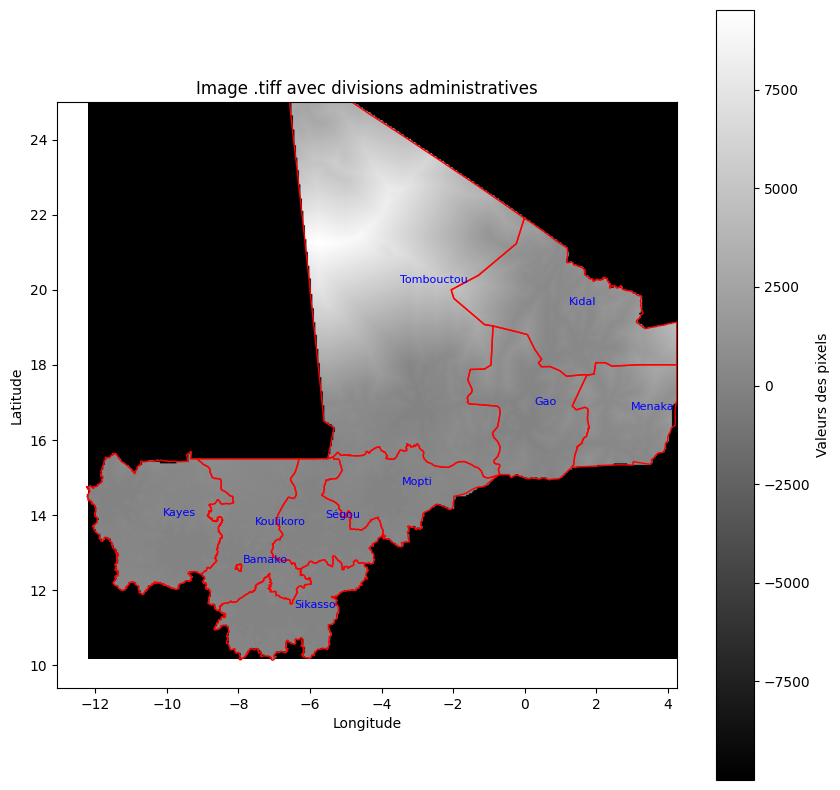

In [28]:
# Afficher la carte avec les données raster et les limites administratives
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher l'image .tiff
plt.imshow(tiff_data, cmap='gray', extent=(transform[2], transform[2] + transform[0] * tiff_data.shape[1],
                                           transform[5] + transform[4] * tiff_data.shape[0], transform[5]))

# Afficher les divisions administratives
gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=1)

# Ajouter les labels
for idx, row in gdf.iterrows():
    # Utiliser le centroïde de chaque division pour positionner le label
    centroid = row.geometry.centroid
    plt.annotate(text=row['ADM1_FR'], xy=(centroid.x, centroid.y), 
                 xytext=(3, 3), textcoords="offset points", 
                 fontsize=8, color='blue')
    
    
# Ajouter une légende et des axes
plt.colorbar(label='Valeurs des pixels')
plt.title('Image .tiff avec divisions administratives')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Afficher la carte
plt.show()


____________________________________

<h2 style="text-align:center; background-color:RGB(128,0,128);font-size:35px;font-family:Algerian"> Visualisation sur une carte </h2>

**Nous utilisons ici la bibliothèque folio**

### Créons une simple carte

In [29]:

# Create a map centered on a specific location
m = folium.Map(location=[12.0, -8.0], zoom_start=6)


# Nous ajoutons un marker
folium.Marker([12.0, -8.0], popup='Point').add_to(m)

In [30]:
m

_



### Ajout du shapefile sur la carte avec les labels en popup

In [33]:

# fichier shapefile contenant les divisions administratives
shapefile = 'mli_admbnda_adm2_1m_gov_20211220.shp' 
gdf = gpd.read_file(shapefile)

# la carte Folium centrée sur une localisation générale
m = folium.Map(location=[12.0, -8.0], zoom_start=6)


# L'ajout des labels
for _, r in gdf.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    folium.Popup(r["ADM2_FR"]).add_to(geo_j)
    geo_j.add_to(m)

In [34]:
m

La taille des pixels dans un fichier raster (.tiff) détermine la résolution spatiale de l'image, c'est-à-dire la taille géographique couverte par chaque pixel. Pour analyser cette taille, il est essentiel de comprendre les informations géospatiales fournies par la transformation du fichier. En utilisant des bibliothèques comme rasterio pour manipuler le .tiff et lire ses métadonnées, on peut extraire les résolutions en X (longitude) et Y (latitude) via l'objet de transformation src.transform. Ces résolutions correspondent à la taille réelle d'un pixel, généralement exprimée en mètres ou en degrés selon le système de projection utilisé.

___________________

In [35]:
 # Calcul de la taille des pixels
pixel_size_x = transform[0]  # Résolution X (généralement en mètres ou degrés)
pixel_size_y = -transform[4]  # Résolution Y (le signe négatif permet d'avoir une taille positive)

# Affichage de la taille des pixels
print(f"Taille des pixels en X (longitude) : {pixel_size_x} degrés")
print(f"Taille des pixels en Y (latitude) : {pixel_size_y} degrés")

# Chaque pixel représente une zone sur le terrain
print(f"Chaque pixel représente une zone de {pixel_size_x} x {pixel_size_y}  degrés sur le terrain.")


Taille des pixels en X (longitude) : 0.008333333333333333 degrés
Taille des pixels en Y (latitude) : 0.008333333333333333 degrés
Chaque pixel représente une zone de 0.008333333333333333 x 0.008333333333333333  degrés sur le terrain.


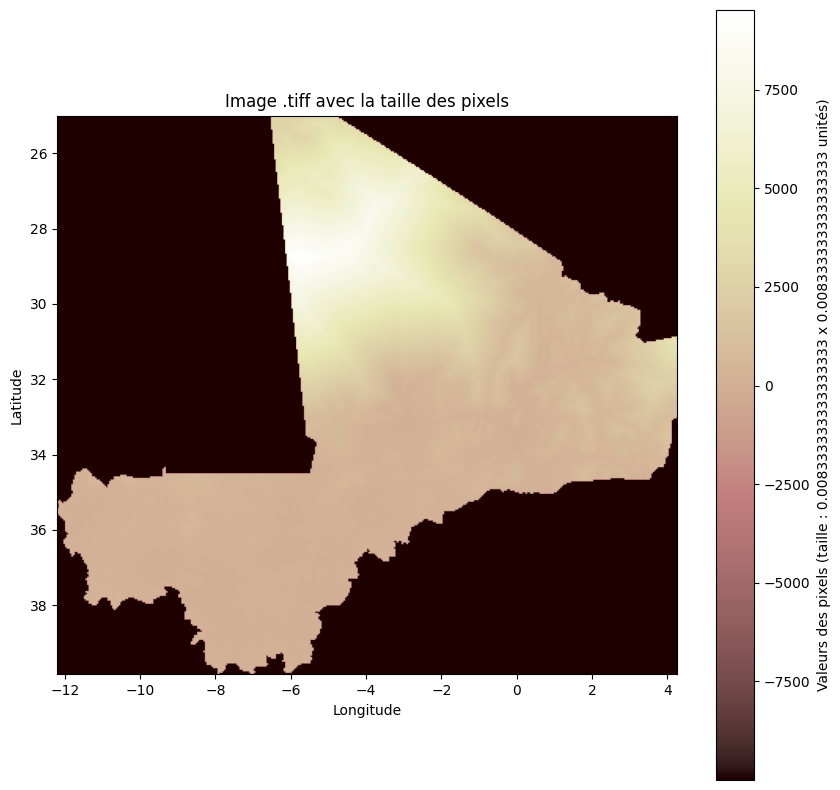

In [36]:
# Afficher l'image .tiff avec les divisions administratives et ajouter la taille des pixels dans la légende
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher l'image .tiff
plt.imshow(tiff_data, cmap='pink', extent=(transform[2], transform[2] + pixel_size_x * tiff_data.shape[1],
                                           transform[5] + pixel_size_y * tiff_data.shape[0], transform[5]))

# Ajouter une légende avec la taille des pixels
plt.colorbar(label=f'Valeurs des pixels (taille : {pixel_size_x} x {pixel_size_y} unités)')
plt.title('Image .tiff avec la taille des pixels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Afficher la carte
plt.show()


In [37]:
import numpy as np

In [38]:
# Statistiques descriptives pour les données raster
# Ignorer les pixels avec des valeurs manquantes (par exemple, -9999)
tiff_data_clean = tiff_data[tiff_data != src.nodata]

# Calcul des statistiques descriptives
mean_value = np.mean(tiff_data_clean)
median_value = np.median(tiff_data_clean)
min_value = np.min(tiff_data_clean)
max_value = np.max(tiff_data_clean)
std_dev = np.std(tiff_data_clean)

# Afficher les statistiques descriptives
print("Statistiques descriptives des données raster:")
print(f"Moyenne: {mean_value}")
print(f"Médiane: {median_value}")
print(f"Valeur minimale: {min_value}")
print(f"Valeur maximale: {max_value}")
print(f"Écart-type: {std_dev}")


Statistiques descriptives des données raster:
Moyenne: 1853.5392900210543
Médiane: 606.0
Valeur minimale: 0
Valeur maximale: 9518
Écart-type: 2337.324636522154


In [39]:
# Vérifier le système de coordonnées actuel
print(gdf.crs)

EPSG:4326


In [40]:
# Reprojeter les données dans un CRS projeté, ici EPSG:32629 (Zone UTM 29N qui couvre le Mali)
gdf = gdf.to_crs(epsg=32629)

# Calculer la surface des polygones reprojetés (en mètres carrés)
gdf['area'] = gdf.geometry.area

# Afficher des statistiques sur la surface
print("Statistiques sur la surface de chaque division administrative (en m²):")
print(gdf['area'].describe())


Statistiques sur la surface de chaque division administrative (en m²):
count    5.300000e+01
mean     2.393847e+10
std      4.748785e+10
min      2.455523e+08
25%      6.828815e+09
50%      1.174918e+10
75%      2.313128e+10
max      3.336345e+11
Name: area, dtype: float64
